In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
data = pd.read_excel('/content/dataset-uci 2.xls')

In [3]:
data = data.drop(23)
data = data.drop('Obesity (%)', axis=1)

In [4]:
y = data['Gallstone Status']
X = data.drop(columns=['Gallstone Status'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

In [14]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [7]:
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression (random_state=1, max_iter=1000)
model. fit(X_train_std, y_train)

y_train_pred = model. predict(X_train_std)
print (classification_report (y_train, y_train_pred))

y_test_pred = model. predict(X_test)
print(classification_report (y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       112
           1       0.90      0.84      0.87       110

    accuracy                           0.87       222
   macro avg       0.88      0.87      0.87       222
weighted avg       0.88      0.87      0.87       222

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        48
           1       1.00      0.02      0.04        48

    accuracy                           0.51        96
   macro avg       0.75      0.51      0.36        96
weighted avg       0.75      0.51      0.36        96



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


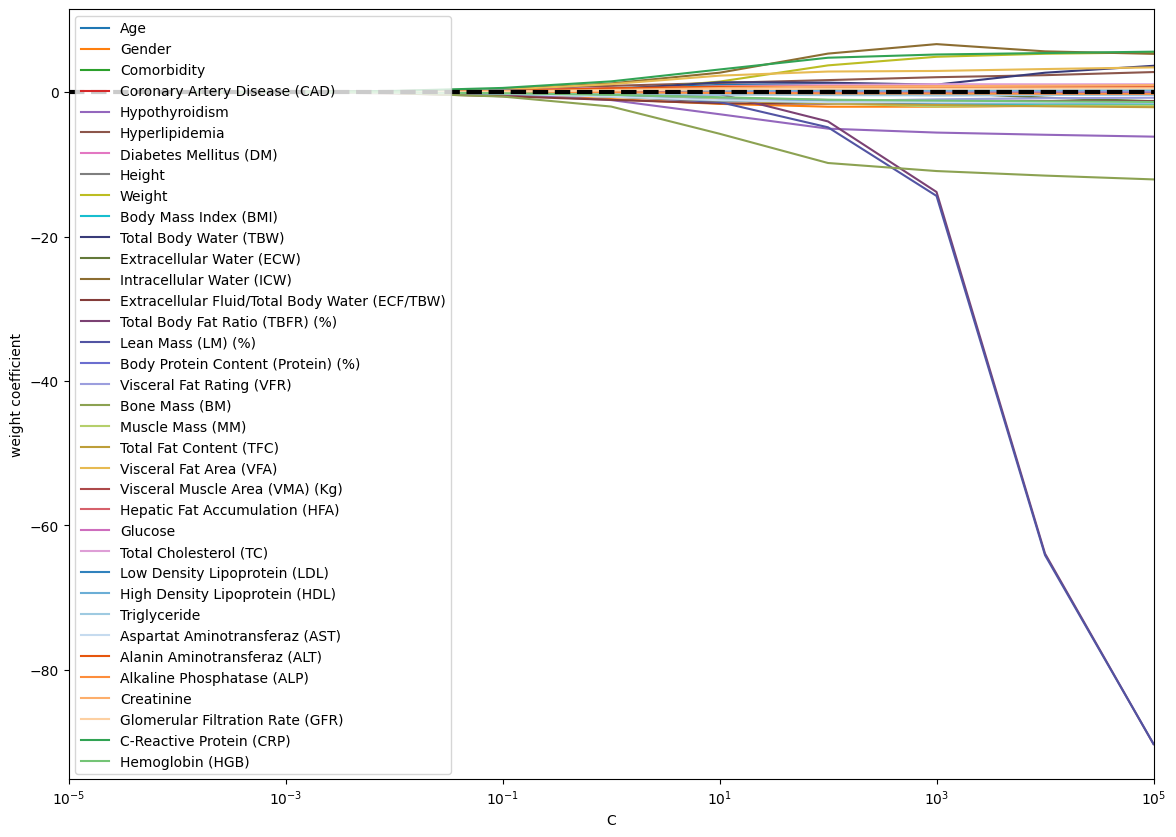

In [8]:
from typing import ParamSpec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
ax = plt.subplot(111)

colors = [ '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173', '#5254a3',
    '#6b6ecf', '#9c9ede', '#8ca252', '#b5cf6b',
    '#bd9e39', '#e7ba52', '#ad494a', '#d6616b', '#ce6dbd', '#de9ed6',
    '#3182bd', '#6baed6', '#9ecae1', '#c6dbef',
    '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476']
weights, params = [], []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(solver='liblinear', C=10.**c, random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[0])
  params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]),colors):
                         plt.plot(params, weights[:, column],
                         label=data.columns[column +1],
                                  color=color)
plt.axhline(0, color='black', linestyle = '--', linewidth=3)
plt.xlim([10**(-5), 10 ** 5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')

In [9]:
import pandas as pd

#데이터 읽이
df= pd.read_excel("dataset-uci 2.xls")

# 'Obesity (%)' 열을 삭재
df= df.drop(columns=['Obesity (%)'])

# 23번째 대이터 삭재（index=22
df= df.drop(index=23)

# 結果確認（任意）
print(df.head())

   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High Density Lipoprotein (HDL)  Triglyceride  \


✅ 최적 C 값: 100
✅ 최고 CV 정확도: 0.7952941176470588

✅ 테스트 정확도: 0.8125

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.83      0.78      0.81        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



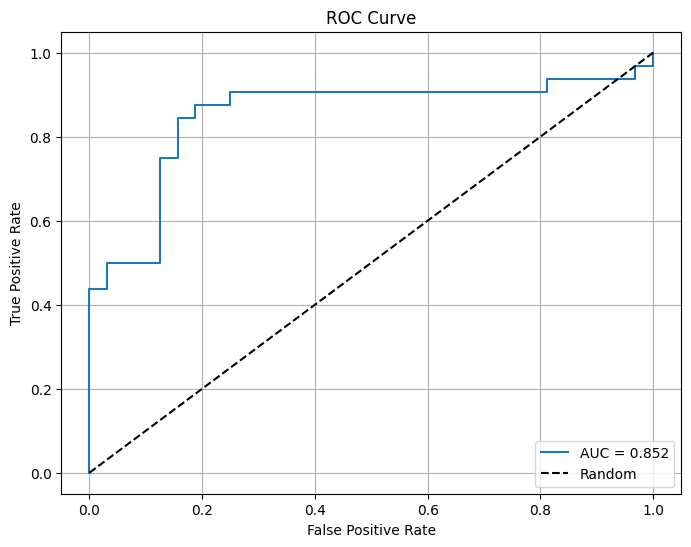

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. 데이터 구성
selected_features = ['Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)',
                     'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Weight',
                     'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Body Protein Content (Protein) (%)',
                     'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'High Density Lipoprotein (HDL)',
                     'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alkaline Phosphatase (ALP)', 'Creatinine',
                     'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']

X = df[selected_features].values
y = df['Gallstone Status'].values  # 타겟 컬럼 이름이 정확하다면

# 2. train-test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 파이프라인 구성: 스케일링 + 로지스틱 회귀
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=1000))
])

# 4. GridSearchCV: C 값 튜닝
param_grid = {
    'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# 5. 결과 출력
print("✅ 최적 C 값:", grid.best_params_['logreg__C'])
print("✅ 최고 CV 정확도:", grid.best_score_)

# 6. 최적 모델로 테스트셋 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n✅ 테스트 정확도:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 7. ROC AUC & 곡선
auc_score = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [16]:
data = pd.read_excel('/content/dataset-uci 2.xls')
data = data.drop(23)
data = data.drop('Obesity (%)', axis=1)

In [17]:
y = data['Gallstone Status']
X = data.drop(columns=['Gallstone Status'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegressionCV

l1_model = LogisticRegressionCV(
    penalty='l1', solver='liblinear', cv=5, Cs=[0.01, 0.1, 1, 10, 100], max_iter=1000
)
l1_model.fit(X_train_std, y_train)

selected_features = X_train.columns[l1_model.coef_[0] != 0]
print("선택된 피처:", selected_features.tolist())

선택된 피처: ['Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [19]:
l1_model = LogisticRegressionCV(
    penalty='l1',
    solver='liblinear',
    cv=5,
    Cs=[0.0001, 0.001, 0.01, 0.1, 1],
    max_iter=2000,
    random_state=0
)
l1_model.fit(X_train_std, y_train)

selected = X_train.columns[l1_model.coef_[0] != 0]
print("선택된 피처:", selected.tolist())

선택된 피처: ['Age', 'Gender', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Total Body Water (TBW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [21]:
data = pd.read_excel('/content/dataset-uci 2.xls')
data = data.drop(23)
data = data.drop('Obesity (%)', axis=1)

In [22]:
y = data['Gallstone Status']
X = data.drop(columns=['Gallstone Status'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
!pip install --upgrade pip
!pip install optuna
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e2)  # C 파라미터 탐색 범위
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'  # l1은 liblinear만 지원

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42))
    ])

    # 5-fold 교차검증으로 accuracy 평가
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')  # 정확도 최대화
study.optimize(objective, n_trials=50)  # 50번 탐색

print('Best params:', study.best_params)
print('Best accuracy:', study.best_value)


[I 2025-06-24 12:48:04,128] A new study created in memory with name: no-name-d117e094-6a06-44c0-a14e-ca52026c2db9
/tmp/ipython-input-23-2776117947.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)  # C 파라미터 탐색 범위
[I 2025-06-24 12:48:04,222] Trial 0 finished with value: 0.712020202020202 and parameters: {'C': 0.005673537403877424, 'penalty': 'l2'}. Best is trial 0 with value: 0.712020202020202.
/tmp/ipython-input-23-2776117947.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)  # C 파라미터 탐색 범위
[I 2025-06-24 12:48:04,306] Trial 1 finished with value: 0.5044444444444445 and parame

Best params: {'C': 8.149641490677043, 'penalty': 'l2'}
Best accuracy: 0.8468686868686868
